### HR Analytics: Mengoptimalkan Sumber Daya Manusia melalui Data

 Dalam dunia bisnis yang terus berubah, peran Sumber Daya Manusia (HR) telah berkembang menjadi lebih dari sekadar administrasi dan pengelolaan karyawan. Saat ini, HR memegang peranan strategis yang penting dalam pengambilan keputusan organisasi. Bagaimana HR dapat mengoptimalkan tenaga kerja, meningkatkan produktivitas, dan memastikan kepuasan karyawan? Jawabannya adalah dengan menerapkan HR Analytics.

 HR Analytics adalah pendekatan yang memanfaatkan data dan analisis untuk memahami lebih dalam dinamika organisasi, karyawan, dan lingkungan kerja. Ini membantu HR dalam mengidentifikasi pola-pola yang mungkin terlewatkan, memprediksi kebutuhan sumber daya manusia di masa depan, dan mengukur dampak kebijakan dan program HR. Dengan HR Analytics, perusahaan dapat membuat keputusan yang lebih tepat dan terinformasi.

 Dalam perjalanan ini, kita akan menjelajahi dunia HR Analytics, memahami bagaimana data dapat digunakan untuk meningkatkan pengelolaan sumber daya manusia, memaksimalkan produktivitas karyawan, dan mencapai tujuan organisasi. Kami akan melihat berbagai metode analisis, teknik visualisasi, dan praktik terbaik dalam HR Analytics untuk membantu Anda meraih keberhasilan dalam pengelolaan sumber daya manusia. Mari kita mulai perjalanan ini menuju pemahaman yang lebih dalam tentang dunia HR Analytics.

 Berikut dibawah ini merupakan Exploratory Data Analysis dari kelompok kami Data Wizards mengenai HR Analytics

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## 1. Descriptive Statistics

A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai? 

B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja? 

C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq)

In [2]:
# Membaca masing masing data set serta menampilkan 5 sampling data dari setiap data set train dan test
df_train = pd.read_csv('aug_train.csv')
df_test = pd.read_csv('aug_test.csv')
df_train.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
10361,27954,city_16,0.910,Male,Has relevent experience,Full time course,Graduate,STEM,13,1000-4999,Pvt Ltd,1,178,0.0
16863,13545,city_16,0.910,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,5000-9999,Pvt Ltd,>4,124,0.0
16912,29261,city_57,0.866,Male,Has relevent experience,no_enrollment,Graduate,STEM,12,100-500,Early Stage Startup,3,62,0.0
15494,29680,city_103,0.920,Male,No relevent experience,Full time course,High School,NaN,2,500-999,Pvt Ltd,1,28,1.0
9605,12985,city_67,0.855,Other,No relevent experience,no_enrollment,Primary School,NaN,1,NaN,NaN,never,17,1.0


In [3]:
df_test.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
1503,31615,city_160,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,500-999,Pvt Ltd,>4,66
1877,5029,city_160,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,15,50-99,Funded Startup,2,57
728,20169,city_103,0.920,NaN,No relevent experience,Full time course,High School,NaN,3,NaN,NaN,never,24
2000,17066,city_114,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,19,50-99,Pvt Ltd,2,58
1047,10640,city_116,0.743,NaN,Has relevent experience,no_enrollment,Masters,STEM,13,100-500,NGO,1,166


Data ini mencakup informasi terkait sumber daya manusia, dengan berbagai variabel seperti pengalaman, pendidikan, jenis kelamin, lokasi, dan lainnya. Terdapat beberapa nilai yang hilang dalam kolom-kolom seperti "gender" dan "company_size". Terdapat juga variasi dalam kolom "last_new_job" yang mencerminkan berapa lama seseorang telah mengganti pekerjaan terakhirnya. Data ini memiliki potensi besar untuk analisis HR yang mendalam. Dengan penerapan HR Analytics, perusahaan dapat memahami tren dalam perekrutan, retensi, dan pengembangan karyawan. Namun, sebelumnya, perlu melakukan pengelolaan data seperti mengisi nilai yang hilang dan memeriksa outlier.

In [4]:
# Informasi Data Frame
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

Jumlah Data: Data frame ini memiliki total **19,158 baris (entri) dan 14 kolom.**

**Kolom dengan Data Tipe Integer (int64):**
enrollee_id: Kolom ID pendaftar. training_hours: Kolom jumlah jam pelatihan.

**Kolom dengan Data Tipe Float (float64):**
city_development_index: Indeks perkembangan kota. target: Kolom target, mungkin berhubungan dengan suatu prediksi atau klasifikasi.

**Kolom dengan Data Tipe Object (teks):**
city: Nama kota. gender: Jenis kelamin pendaftar. relevent_experience: Pengalaman yang relevan. enrolled_university: Universitas tempat pendaftar terdaftar. education_level: Tingkat pendidikan pendaftar. major_discipline: Disiplin ilmu utama pendaftar. experience: Pengalaman pendaftar. company_size: Ukuran perusahaan di mana pendaftar bekerja. company_type: Tipe perusahaan di mana pendaftar bekerja. last_new_job: Jumlah tahun sejak pekerjaan terakhir.

**Target Variable:**
Kolom target digunakan sebagai variabel target untuk tugas analisis atau pemodelan. Tipe data kolom ini adalah float64, yang menunjukkan kemungkinan ini adalah kolom target yang mengandung nilai numerik.

In [5]:
# Mengelompokkan kolom - kolom dari data frame
cats=['city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size',
      'company_type','last_new_job']
nums=['enrollee_id','city_development_index','training_hours','target']

In [6]:
#Statistik Deskriptif kolom numerikal
df_train[nums].describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


Statistik deskriptif untuk kolom numerikal:

1. Kolom 'enrollee_id' memiliki rentang ID pendaftar dari 1 hingga 33,380, dengan distribusi yang merata.
2. Kolom 'city_development_index' memiliki rata-rata sekitar 0.829 dengan range yang wajar antara 0.448 hingga 0.949.
3. Kolom 'training_hours' memiliki rata-rata sekitar 65.37 dengan range antara 1 hingga 336.
4. Kolom 'target' adalah variabel biner, di mana sekitar 25% pendaftar memiliki nilai target 1.

**Tidak ada data yang mencolok atau aneh dalam statistik ini.**

In [7]:
# Statistik deskriptif kolom kategorikal
df_train[cats].describe()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


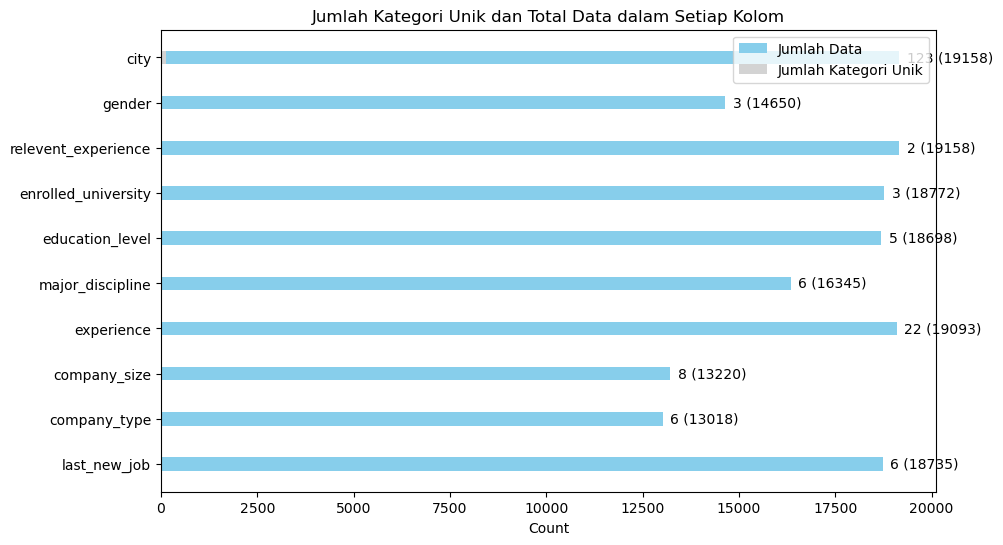

In [8]:
columns = ["city", "gender", "relevent_experience", "enrolled_university", "education_level", "major_discipline", "experience", "company_size", "company_type", "last_new_job"]
count = [19158, 14650, 19158, 18772, 18698, 16345, 19093, 13220, 13018, 18735]
unique_values = [123, 3, 2, 3, 5, 6, 22, 8, 6, 6]

plt.figure(figsize=(10, 6))
bar_width = 0.3 
index = range(len(columns))

plt.barh(index, count, bar_width, color='skyblue', label='Jumlah Data')
plt.barh(index, unique_values, bar_width, color='lightgrey', label='Jumlah Kategori Unik')

for i in index:
    plt.text(count[i] + 200, i, f'{unique_values[i]} ({count[i]})', va='center')

plt.xlabel('Count')
plt.title('Jumlah Kategori Unik dan Total Data dalam Setiap Kolom')
plt.yticks(index, columns)
plt.gca().invert_yaxis()
plt.legend()
plt.show()

Statistik deskriptif untuk kolom kategorikal:

1. Kolom 'gender' memiliki data yang hilang dan berisi jenis kelamin paling umum adalah 'Male' dengan jenis kelamin Unik ada 3 dan Jumlah data 14.650.
2. Kolom 'enrolled_university' memiliki data yang hilang dan mayoritas tidak terdaftar di universitas jumlah Unik 3 dan Jumlah data 18.772.
3. Kolom 'education_level' memiliki data yang hilang dan mayoritas adalah lulusan Nilai Unik: 5 Jumlah Data: 18,698
4. Kolom 'major_discipline' memiliki beberapa nilai unik dan yang paling umum adalah 'STEM' Nilai Unik: 6 Jumlah Data: 16,345.
5. Kolom 'company_size' memiliki data yang hilang dan ukuran '50-99' adalah yang paling umum Nilai Unik: 8 Jumlah Data: 13,220
6. Kolom 'company_type' memiliki data yang hilang dan 'Pvt Ltd' adalah yang paling umum Nilai Unik: 6 Jumlah Data: 13,018
7. Kolom 'last_new_job' memiliki data yang hilang dan '1' adalah yang paling umum Nilai Unik: 6 Jumlah Data: 18,735

**!! Kolom gender memiliki 3 nilai unik (seharusnya terdapat 2 gender saja (Male dan Female))**

In [9]:
# Menghitung jumlah NaN atau nilai yang kosong
print("Missing Values")
print(df_train.isnull().sum())

#Check for missing values Percentage
print("\nMissing Values Percentage")
print(df_train.isna().sum()/len(df_train))

Missing Values
enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

Missing Values Percentage
enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64


**Data yang Tidak Lengkap (NaN):**

Beberapa kolom seperti **gender**, **enrolled_university**, **education_level**, **major_discipline**, **experience**, **company_size**, dan **company_type** memiliki nilai yang hilang (NaN).

## 1. Descriptive Statistics (Kesimpulan)
A. Semua tipe data sudah sesuai 

B. Kolom **gender**, **enrolled_university**, **education_level**, **major_discipline**, **experience**, **company_size**, **company_type**, **last_new job**, dan **training_hours** memiliki nilai kosong 

C. Kolom gender yang seharusnya memiliki 2 nilai unik ternyata memiliki 3 nilai unik.

## 2. Univariate Analysis
Gunakan **visualisasi** untuk melihat distribusi masing-masing kolom (feature maupun target). Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing.

#### Numerical Features

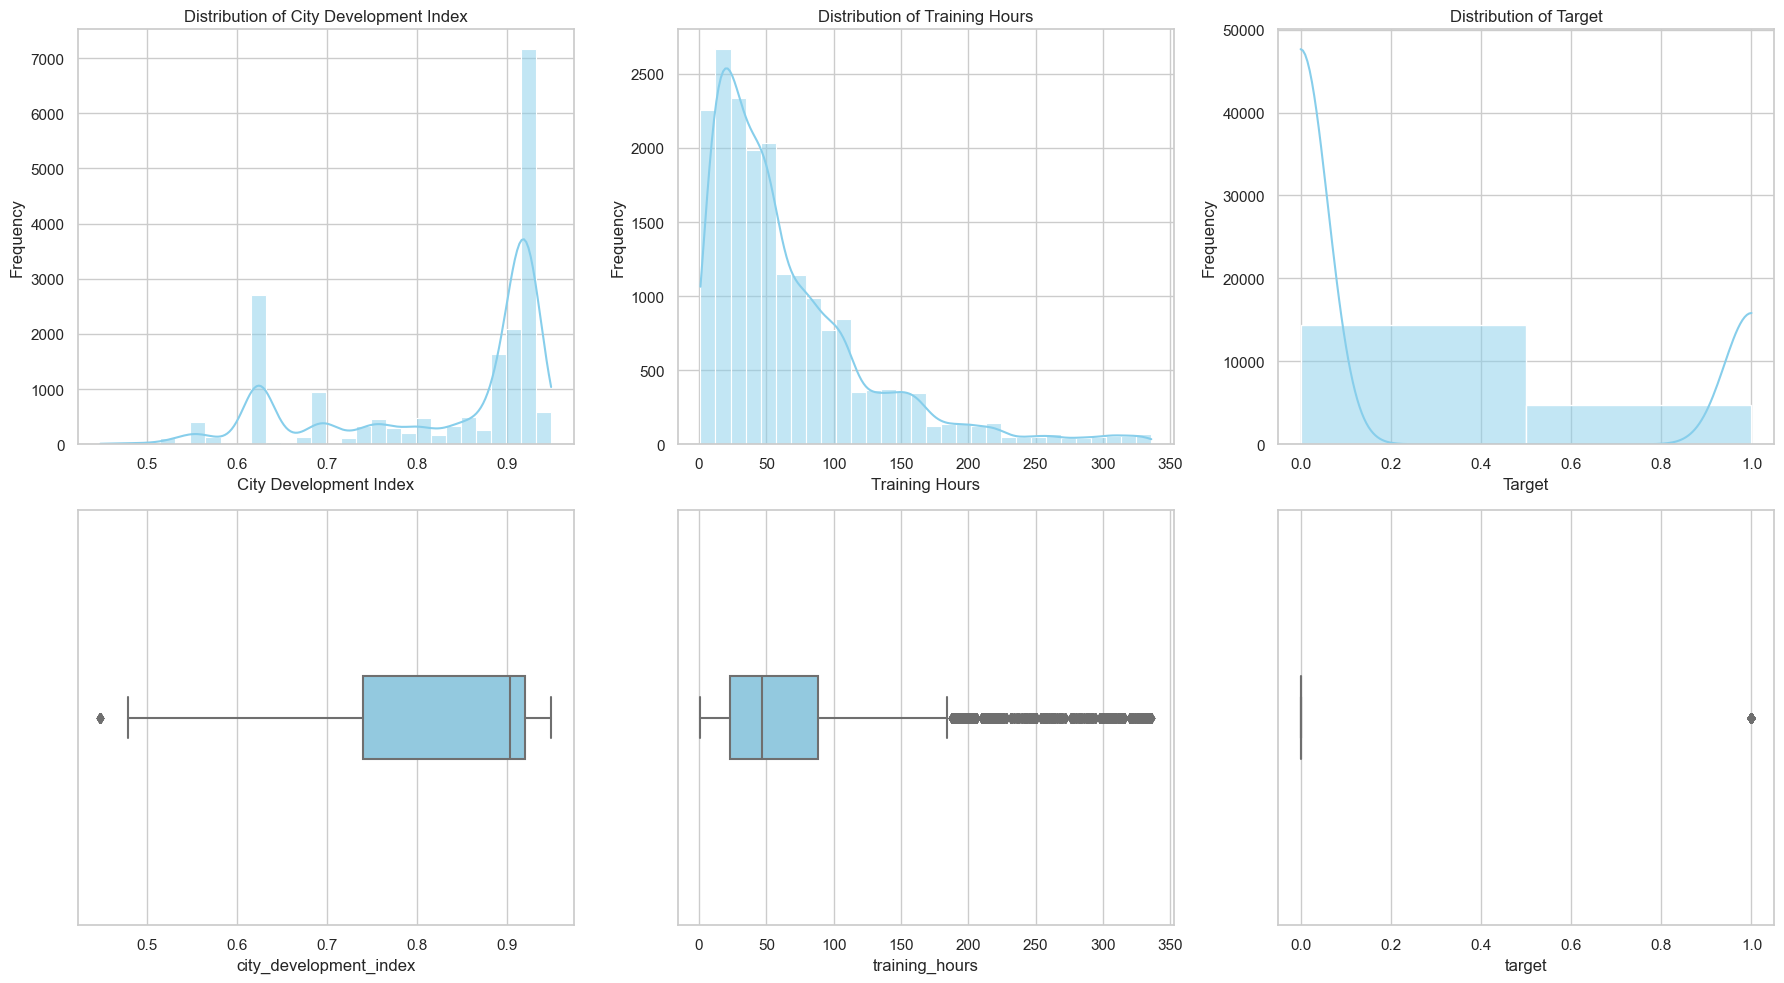

In [10]:
sns.set(style='whitegrid')

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

sns.histplot(ax=axes[0, 0], x=df_train['city_development_index'], bins=30, kde=True, color='skyblue')
axes[0, 0].set_title('Distribution of City Development Index')
axes[0, 0].set_xlabel('City Development Index')
axes[0, 0].set_ylabel('Frequency')
sns.boxplot(ax=axes[1, 0], x=df_train['city_development_index'], color='skyblue', width=0.2)

sns.histplot(ax=axes[0, 1], x=df_train['training_hours'], bins=30, kde=True, color='skyblue')
axes[0, 1].set_title('Distribution of Training Hours')
axes[0, 1].set_xlabel('Training Hours')
axes[0, 1].set_ylabel('Frequency')
sns.boxplot(ax=axes[1, 1], x=df_train['training_hours'], color='skyblue', width=0.2)

sns.histplot(ax=axes[0, 2], x=df_train['target'], bins=2, kde=True, color='skyblue')
axes[0, 2].set_title('Distribution of Target')
axes[0, 2].set_xlabel('Target')
axes[0, 2].set_ylabel('Frequency')
sns.boxplot(ax=axes[1, 2], x=df_train['target'], color='skyblue', width=0.2)

plt.tight_layout()

plt.show()

#### Kesimpulan data numerikal
1. Distribution of City Development Index (Distribusi Indeks Pembangunan Kota):
CDI memiliki distribusi **bimodal** dengan dua puncak. Mayoritas data terkonsentrasi di sekitar nilai tengah indeks pembangunan kota. Terdapat beberapa nilai ekstrem yang diidentifikasi sebagai outlier dalam box plot. 

2. Distribution of Training Hours (Distribusi Jam Pelatihan): 
Distribusi jam pelatihan **skew ke kanan** (positively skewed) dengan nilai **median yang lebih kecil daripada mean** (lihat df.describe pada no.1). Mayoritas data berpusat di sekitar nilai rendah hingga menengah jam pelatihan. Terdapat beberapa data yang diidentifikasi sebagai outlier dalam box plot, yang mengindikasikan jam pelatihan yang jauh lebih tinggi dari mayoritas. 

3. Distribution of Target (Distribusi Target): 
Distribusi target menunjukkan bahwa mayoritas data adalah "non-seeking" (tidak mencari pekerjaan) dengan **persentase 3:1**. Dengan kata lain, hanya 25% enrollee adalah pencari pekerjaan baru.

####  Categorical Features

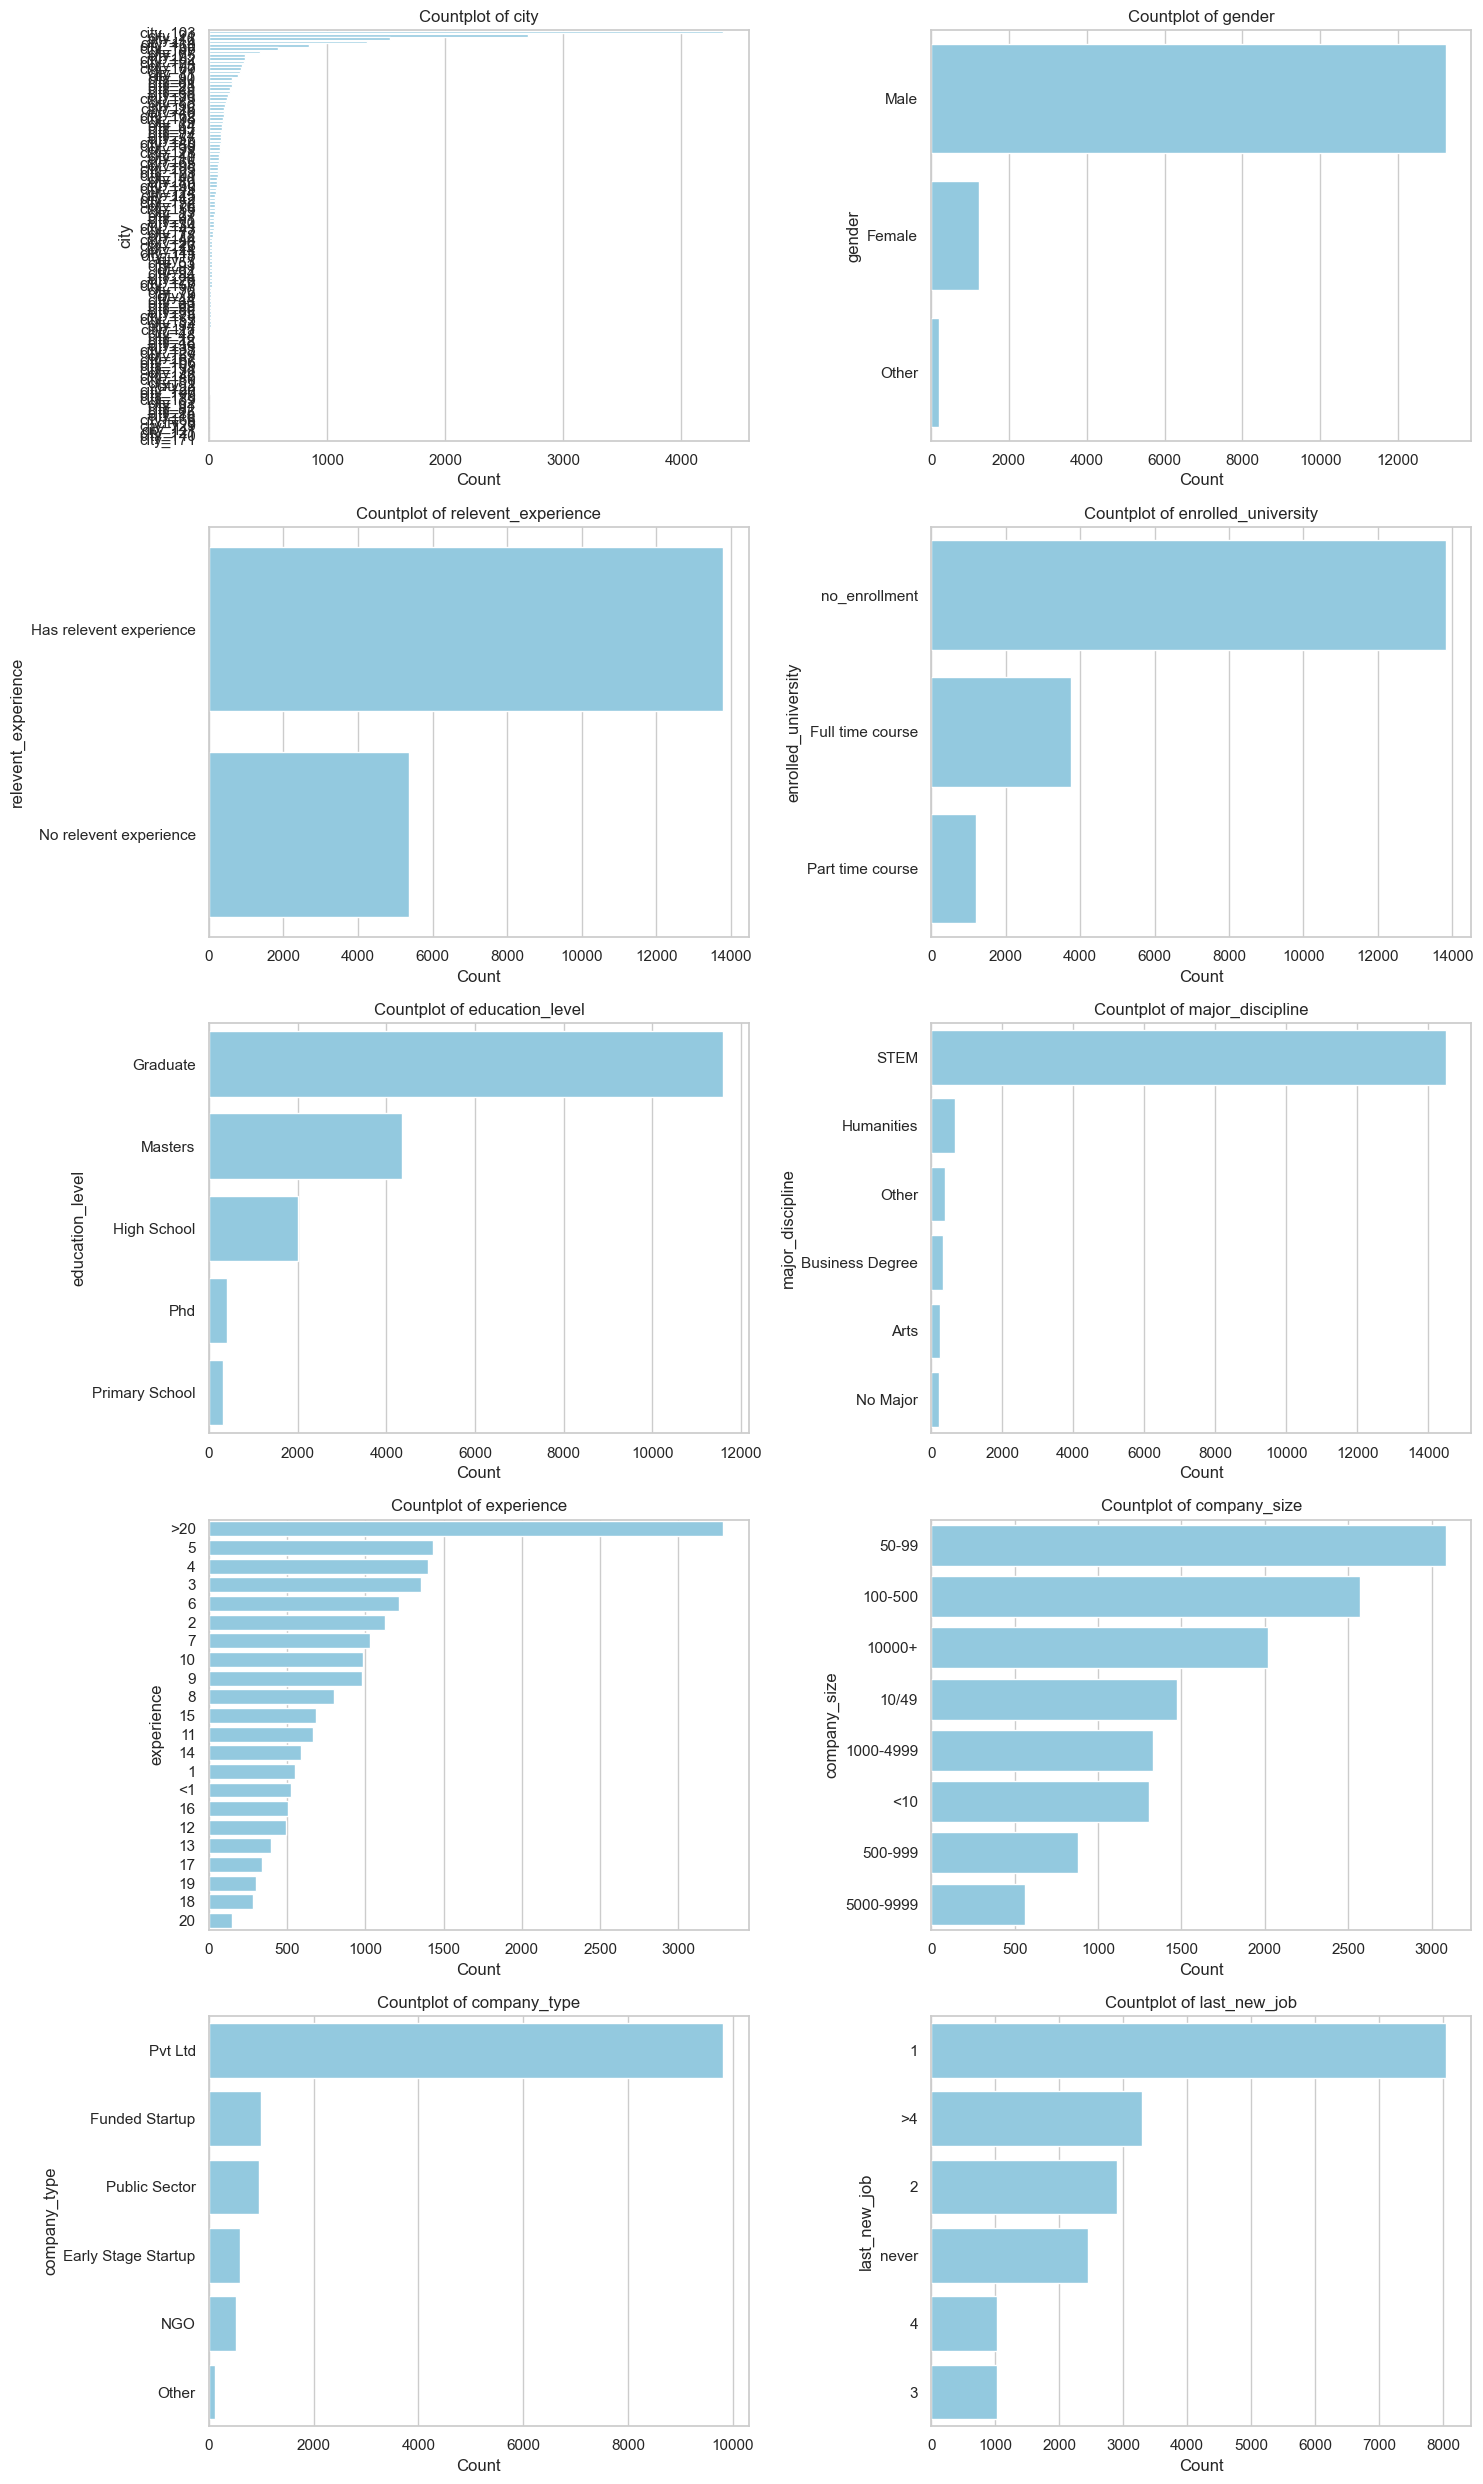

In [11]:
# Select the categorical features
categorical_features = ['city', 'gender', 'relevent_experience', 'enrolled_university',
                        'education_level', 'major_discipline', 'experience', 'company_size',
                        'company_type', 'last_new_job']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through categorical features and plot bar charts
for i, feature in enumerate(categorical_features):
    sns.countplot(data=df_train, y=feature, ax=axes[i], order=df_train[feature].value_counts().index, color='skyblue')
    axes[i].set_title(f'Countplot of {feature}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(feature)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

#### Kesimpulan data kategorikal

- city: Distribusi kota agak **tidak merata**, beberapa kota memiliki **frekuensi yang tinggi.** 
- gender: Terdapat kategori 'Other' yang mungkin perlu diperiksa lebih lanjut. Selain itu, **perbedaan frekuensi antara jenis kelamin cukup besar.** 
- relevent_experience: Mayoritas kandidat **memiliki pengalaman relevan.** 
- education_level: Kategori **'Primary School'** memiliki frekuensi yang **rendah** dibandingkan dengan kategori lainnya. 
- major_discipline: Mayoritas kandidat memiliki disiplin mayor di bidang **Engineering.** 
- experience: Distribusi pengalaman terlihat wajar, namun ada beberapa nilai yang mungkin perlu diinspeksi lebih lanjut. 
- company_size: Kategori **'50-99' dan '100-500' memiliki frekuensi tertinggi.** Nilai 10/49 perlu diubah menjadi 10-49 
- company_type: Mayoritas kandidat bekerja di perusahaan sektor **Private.** 
- last_new_job: Mayoritas kandidat telah mengganti pekerjaan dalam waktu **kurang dari satu tahun.** 
- target: **Distribusi target tidak seimbang,** dengan **mayoritas** kandidat **tidak mencari perubahan pekerjaan.**

Follow-up **data preprocessing** yang dapat dilakukan meliputi:

- Handling Missing Values: Perlu memeriksa dan mengatasi nilai yang hilang pada kolom dengan missing values seperti 'gender','enrolled_university', 'education_level', dsb. 
- Outlier Detection and Handling: Memeriksa apakah ada outlier pada variabel numerik dan mengambil tindakan yang sesuai jika ada. 
- Encoding Categorical Variables: Melakukan encoding pada variabel kategorikal untuk mengubahnya menjadi bentuk numerik yang dapat digunakan dalam pemodelan. 
- Balancing Target: Mengambil tindakan untuk menangani ketidakseimbangan dalam target (oversampling, undersampling, atau metode lainnya). 
- Feature Scaling: Melakukan normalisasi atau standardisasi pada variabel numerik jika dibutuhkan. 
- Feature Engineering: Mungkin ada kemungkinan untuk menggabungkan, memisahkan, atau mengubah fitur untuk meningkatkan kinerja model. 
- Validasi Data: Memastikan bahwa dataset telah divalidasi dengan benar untuk mengidentifikasi potensi masalah atau anomali lain yang perlu ditangani.

## 3. Multivariate Analysis + 4. Business Insight

Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang diajarkan di kelas). Tuliskan hasil observasinya, seperti: 

A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan? 

B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?

- Tuliskan juga jika memang tidak ada feature yang saling berkorelasi

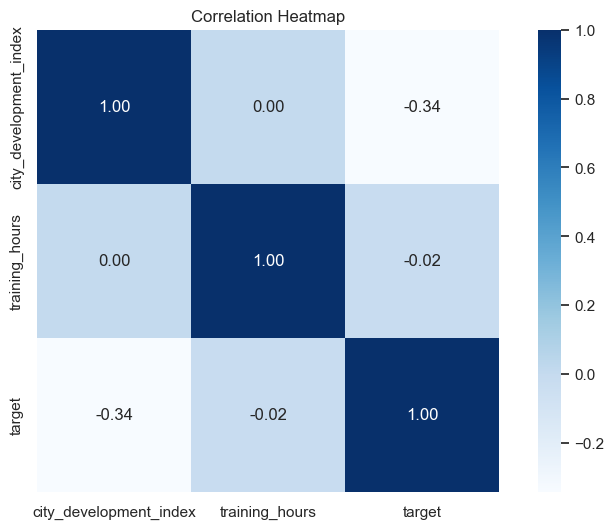

In [12]:
# Selecting the numerical features and target
numerical_features = ['city_development_index', 'training_hours', 'target']

# Subset the DataFrame with only the numerical features
numerical_df = df_train[numerical_features]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

Dari heatmap korelasi antara fitur-fitur numerik dan target ("city_development_index", "training_hours," dan "target"), kita dapat membuat beberapa kesimpulan:

1. City Development Index (CDI): Korelasi antara CDI dan target sangat rendah (0.04). Ini menunjukkan bahwa CDI tidak memiliki **pengaruh signifikan terhadap keputusan pencari kerja untuk mencari pekerjaan baru.**

2. Training Hours: Korelasi antara jumlah jam pelatihan ("training_hours") dan target juga rendah (-0.021). Ini menunjukkan bahwa **jumlah jam pelatihan yang diambil oleh pencari kerja juga tidak memiliki pengaruh signifikan terhadap keputusan mereka untuk mencari pekerjaan baru.**

Kesimpulannya, dari analisis korelasi, tidak ada fitur numerik yang memiliki korelasi yang kuat dengan kolom "target." Ini menunjukkan bahwa keputusan pencari kerja untuk mencari pekerjaan baru kemungkinan besar dipengaruhi oleh faktor-faktor lain yang tidak tercakup dalam fitur-fitur numerik ini. Oleh karena itu, penting untuk mempertimbangkan fitur-fitur lain atau faktor-faktor kualitatif dalam analisis yang mungkin lebih memengaruhi keputusan pencari kerja.